In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


def load_data_to_df():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter = ","
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(
        file_path_labels, delimiter=delimiter, header=0, quotechar='"'
    )
    images = df_data.to_numpy()
    correct_images = [im.reshape(64, 64).T for im in images]
    correct_images = np.array(correct_images)
    flattened_correct_images = [im.flatten() for im in correct_images]
    df = pd.DataFrame(flattened_correct_images)
    df["Label"] = df_labels

    return df


def plot_image_on_ax(ax, image, pixel_size=64, index=""):
    ax.imshow(
        image.reshape(pixel_size, pixel_size),
        cmap="gray",
    )
    ax.set_title(f"{index}", fontsize=30)  # Increase the font size to 16
    ax.axis("off")


def get_image_from_df(df, index):
    return df.iloc[index, :-1].values


def get_all_images_from_df_as_numpy(df):
    # Note: this does not work for the df with blocks
    return df.iloc[:, :-1].to_numpy()

In [43]:
df = load_data_to_df()

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,23,78,102,10,49,152,23,159,149,131,...,123,131,149,149,159,166,166,166,166,0
1,247,247,245,247,247,245,245,223,196,138,...,78,70,70,70,70,70,70,78,78,0
2,77,77,77,77,77,77,87,87,105,87,...,94,94,105,116,105,116,105,116,116,1
3,32,28,28,28,28,32,60,73,79,69,...,240,233,207,179,131,140,140,140,131,1
4,3,32,71,100,118,132,127,120,124,131,...,149,169,162,169,170,170,133,63,14,1


In [45]:
# Create an empty df with 255 rows
df_empty = pd.DataFrame(np.zeros((256, 2)), columns=["Cat", "Dog"])
df_empty = df_empty.astype(int)

# Loop through the df and add the number of times each pixel value appears as cat or dog
for index, row in df.iterrows():
    label = row.iloc[-1]
    for c in row[:-1]:
        if label == 0:
            df_empty.loc[c, "Cat"] += 1
        elif label == 1:
            df_empty.loc[c, "Dog"] += 1

In [49]:
# Add a percentage column to df_empty
df_empty["Cat_percentage"] = df_empty["Cat"] / (df_empty["Cat"] + df_empty["Dog"])
df_empty["Dog_percentage"] = df_empty["Dog"] / (df_empty["Cat"] + df_empty["Dog"])
df_empty = df_empty.round(2)

In [53]:
# Add a column with the percentage difference between cat and dog
df_empty["Difference"] = abs(df_empty["Cat_percentage"] - df_empty["Dog_percentage"])
#df_empty = df_empty.sort_values(by="Difference", ascending=False)
df_empty.head()

,Cat,Dog,Cat_percentage,Dog_percentage,Difference
0,728,1114,0.40,0.60,0.20
1,812,713,0.53,0.47,0.06
2,491,335,0.59,0.41,0.18
3,4265,828,0.84,0.16,0.68
4,8735,711,0.92,0.08,0.84


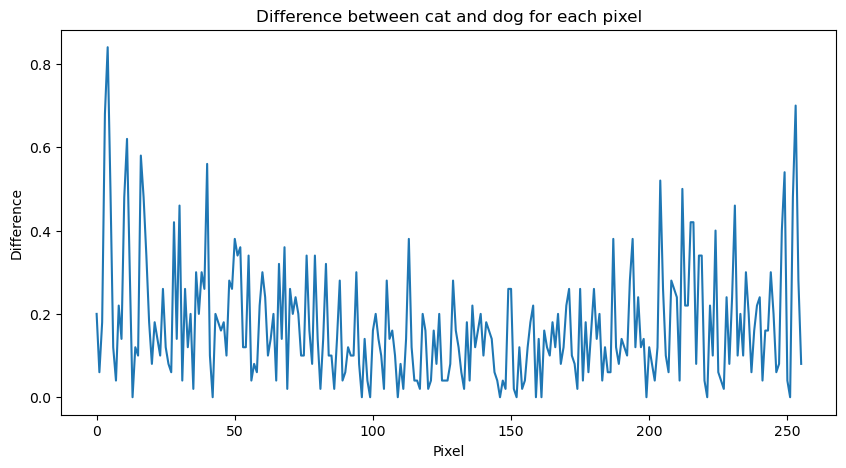

In [54]:
# Plot the difference between cat and dog for each pixel
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(df_empty["Difference"])
ax.set_title("Difference between cat and dog for each pixel")
ax.set_xlabel("Pixel")
ax.set_ylabel("Difference")
plt.show()

In [55]:
# Print the 10 pixels with the highest difference
df_empty = df_empty.sort_values(by="Difference", ascending=False)
df_empty.head(10)


,Cat,Dog,Cat_percentage,Dog_percentage,Difference
4,8735,711,0.92,0.08,0.84
253,98,564,0.15,0.85,0.70
3,4265,828,0.84,0.16,0.68
11,392,1667,0.19,0.81,0.62
16,432,1613,0.21,0.79,0.58
40,695,2410,0.22,0.78,0.56
249,497,1643,0.23,0.77,0.54
204,848,2710,0.24,0.76,0.52
5,2385,780,0.75,0.25,0.50
212,581,1753,0.25,0.75,0.50
